<a href="https://colab.research.google.com/github/ayanoglu/Sensor-Network-Prediction-Models/blob/main-functionsgeneralized-TL/ColdChainTransportation_Time_Series_Prediction_For_Sensor_Networks_Prediction_based_on_number_of_sensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARIES AND DATASET**

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from numpy import array
from sklearn import preprocessing
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
np.set_printoptions(linewidth=160)
import tensorflow as tf
import csv
import math
import matplotlib.pyplot as plt
from decimal import *
from google.colab import files
import plotly.graph_objects as go
import plotly.express as px
import itertools
from itertools import combinations
import time
from sklearn.metrics import mean_squared_error

uploaded = files.upload()

Saving DataPartial_1.xlsx to DataPartial_1 (1).xlsx
Saving DataPartial_2.xlsx to DataPartial_2.xlsx
Saving DataPartial_3.xlsx to DataPartial_3.xlsx
Saving DataPartial_4.xlsx to DataPartial_4.xlsx
Saving DataPartial_5.xlsx to DataPartial_5.xlsx
Saving DataPartial_6.xlsx to DataPartial_6.xlsx
Saving DataPartial_7.xlsx to DataPartial_7.xlsx
Saving DataPartial_8.xlsx to DataPartial_8.xlsx


In [6]:
import io
DP1 = pd.read_excel(io.BytesIO(uploaded['DataPartial_1.xlsx']))
DP2 = pd.read_excel(io.BytesIO(uploaded['DataPartial_2.xlsx']))
DP3 = pd.read_excel(io.BytesIO(uploaded['DataPartial_3.xlsx']))
DP4 = pd.read_excel(io.BytesIO(uploaded['DataPartial_4.xlsx']))
DP5 = pd.read_excel(io.BytesIO(uploaded['DataPartial_5.xlsx']))
DP6 = pd.read_excel(io.BytesIO(uploaded['DataPartial_6.xlsx']))
DP7 = pd.read_excel(io.BytesIO(uploaded['DataPartial_7.xlsx']))
DP8 = pd.read_excel(io.BytesIO(uploaded['DataPartial_8.xlsx']))

In [14]:
print(f'DP1.shape {DP1.shape} , DP2.shape {DP2.shape}, DP3.shape {DP3.shape}, DP4.shape {DP4.shape}')
print(f'DP5.shape {DP5.shape} , DP6.shape {DP6.shape}, DP7.shape {DP7.shape}, DP8.shape {DP8.shape}')

DP1.shape (288229, 5) , DP2.shape (288229, 5), DP3.shape (288229, 5), DP4.shape (288229, 5)
DP5.shape (288229, 5) , DP6.shape (288229, 5), DP7.shape (288229, 5), DP8.shape (288229, 5)


In [15]:
DP1.head()

,Column1,Column2,Column3,Column4,Column5
0,2004-03-31,03:38:15.758000,2,1,122.1530
1,2004-02-28,00:59:16.028000,3,1,19.9884
2,2004-02-28,01:03:16.334000,11,1,19.3024
3,2004-02-28,01:06:16.013000,17,1,19.1652
4,2004-02-28,01:06:46.778000,18,1,19.1750


**READ IN THE CSV FILE, LOCATE COLUMNS AND SAVE AS FEATURES**

**PLOT "Front Top", "Mid Top" AND "Rear Top"**

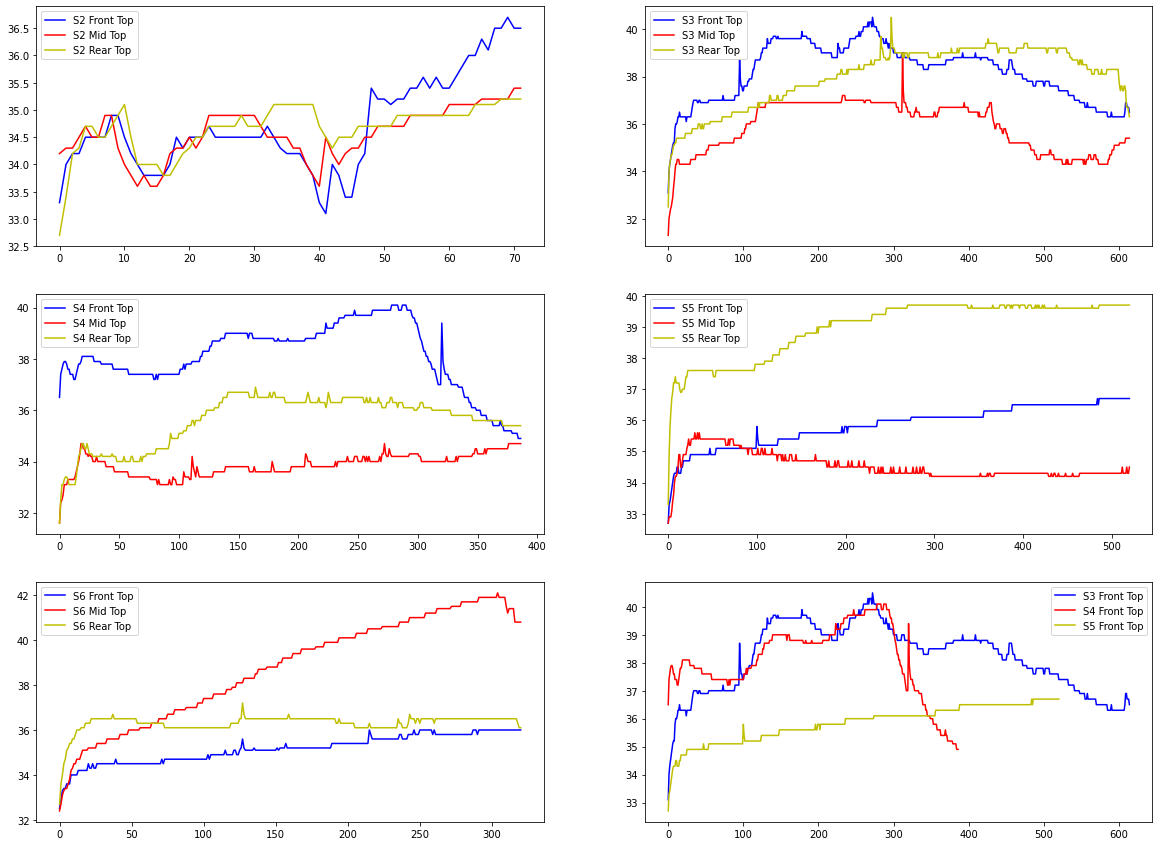

In [ ]:
import io
S2 = pd.read_csv(io.BytesIO(uploaded['S2.csv']))
S3 = pd.read_csv(io.BytesIO(uploaded['S3.csv']))
S4 = pd.read_csv(io.BytesIO(uploaded['S4.csv']))
S5 = pd.read_csv(io.BytesIO(uploaded['S5.csv']))
S6 = pd.read_csv(io.BytesIO(uploaded['S6.csv']))

def csvtocolumns(dataset):
  FT = dataset.iloc[:,1]
  FM = dataset.iloc[:,2]
  FB = dataset.iloc[:,3]
  MT = dataset.iloc[:,4]
  MM = dataset.iloc[:,5]
  MB = dataset.iloc[:,6]
  RT = dataset.iloc[:,7]
  RM = dataset.iloc[:,8]
  RB = dataset.iloc[:,9]
  return FT, FM, FB, MT, MM, MB, RT, RM, RB

S2FT, S2FM, S2FB, S2MT, S2MM, S2MB, S2RT, S2RM, S2RB = csvtocolumns(S2)
S3FT, S3FM, S3FB, S3MT, S3MM, S3MB, S3RT, S3RM, S3RB = csvtocolumns(S3)
S4FT, S4FM, S4FB, S4MT, S4MM, S4MB, S4RT, S4RM, S4RB = csvtocolumns(S4)
S5FT, S5FM, S5FB, S5MT, S5MM, S5MB, S5RT, S5RM, S5RB = csvtocolumns(S5)
S6FT, S6FM, S6FB, S6MT, S6MM, S6MB, S6RT, S6RM, S6RB = csvtocolumns(S6)

#print(f'Length of S2 {len(S2FT)} , {len(S2FM)} , {len(S2FB)} , {len(S2MT)} , {len(S2MM)} , {len(S2MB)} , {len(S2RT)} , {len(S2RM)} , {len(S2RB)}')
#print(f'Length of S2 {len(S3FT)} , {len(S3FM)} , {len(S3FB)} , {len(S3MT)} , {len(S3MM)} , {len(S3MB)} , {len(S3RT)} , {len(S3RM)} , {len(S3RB)}')
#print(f'Length of S2 {len(S4FT)} , {len(S4FM)} , {len(S4FB)} , {len(S4MT)} , {len(S4MM)} , {len(S4MB)} , {len(S4RT)} , {len(S4RM)} , {len(S4RB)}')
#print(f'Length of S2 {len(S5FT)} , {len(S5FM)} , {len(S5FB)} , {len(S5MT)} , {len(S5MM)} , {len(S5MB)} , {len(S5RT)} , {len(S5RM)} , {len(S5RB)}')
#print(f'Length of S2 {len(S6FT)} , {len(S6FM)} , {len(S6FB)} , {len(S6MT)} , {len(S6MM)} , {len(S6MB)} , {len(S6RT)} , {len(S6RM)} , {len(S6RB)}')

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

ax[0,0].plot(S2FT, "b", label='S2 Front Top')
ax[0,0].plot(S2MT, "r", label='S2 Mid Top')
ax[0,0].plot(S2RT, "y", label='S2 Rear Top')
ax[0,0].legend()

ax[0,1].plot(S3FT, "b", label='S3 Front Top')
ax[0,1].plot(S3MT, "r", label='S3 Mid Top')
ax[0,1].plot(S3RT, "y", label='S3 Rear Top')
ax[0,1].legend()

ax[1,0].plot(S4FT, "b", label='S4 Front Top')
ax[1,0].plot(S4MT, "r", label='S4 Mid Top')
ax[1,0].plot(S4RT, "y", label='S4 Rear Top')
ax[1,0].legend()

ax[1,1].plot(S5FT, "b", label='S5 Front Top')
ax[1,1].plot(S5MT, "r", label='S5 Mid Top')
ax[1,1].plot(S5RT, "y", label='S5 Rear Top')
ax[1,1].legend()

ax[2,0].plot(S6FT, "b", label='S6 Front Top')
ax[2,0].plot(S6MT, "r", label='S6 Mid Top')
ax[2,0].plot(S6RT, "y", label='S6 Rear Top')
ax[2,0].legend()

ax[2,1].plot(S3FT, "b", label='S3 Front Top')
ax[2,1].plot(S4FT, "r", label='S4 Front Top')
ax[2,1].plot(S5FT, "y", label='S5 Front Top')
ax[2,1].legend()

plt.show()

In [ ]:
print(f'Any Nan values in S2? {(S2.isnull().values.any())}')
print(f'Any Nan values in S3? {(S3.isnull().values.any())}')
print(f'Any Nan values in S4? {(S4.isnull().values.any())}')
print(f'Any Nan values in S5? {(S5.isnull().values.any())}')
print(f'Any Nan values in S6? {(S6.isnull().values.any())}')

S6FT, S6FM, S6FB, S6MT, S6MM, S6MB, S6RT, S6RM, S6RB

print(f'Any Nan values in S6FT? {(S6FT.isnull().values.any())}')
print(f'Any Nan values in S6FM? {(S6FM.isnull().values.any())}')
print(f'Any Nan values in S6FB? {(S6FB.isnull().values.any())}')
print(f'Any Nan values in S6MT? {(S6MT.isnull().values.any())}')
print(f'Any Nan values in S6MM? {(S6MM.isnull().values.any())}')
print(f'Any Nan values in S6MB? {(S6MB.isnull().values.any())}')
print(f'Any Nan values in S6RT? {(S6RT.isnull().values.any())}')
print(f'Any Nan values in S6RM? {(S6RM.isnull().values.any())}')
print(f'Any Nan values in S6RB? {(S6RB.isnull().values.any())}')

Any Nan values in S2? False
Any Nan values in S3? False
Any Nan values in S4? False
Any Nan values in S5? False
Any Nan values in S6? True
Any Nan values in S6FT? False
Any Nan values in S6FM? False
Any Nan values in S6FB? True
Any Nan values in S6MT? False
Any Nan values in S6MM? False
Any Nan values in S6MB? False
Any Nan values in S6RT? False
Any Nan values in S6RM? False
Any Nan values in S6RB? False


**DEFINE THE SEQUENCE CREATING FUNCTION, CONVERT DATASET DATA TO ARRAY AND CREATE SEQUENCE**

In [ ]:
def create_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix-4] # so that we can get the 3rd data of 0-7 sequence 
		# seq_x, seq_y = sequence[i:end_ix], sequence[end_ix] 
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

S2FTA = pd.DataFrame.to_numpy(S2FT)
S2MTA = pd.DataFrame.to_numpy(S2MT)
S2RTA = pd.DataFrame.to_numpy(S2RT)
S2FMA = pd.DataFrame.to_numpy(S2FM)
S2MMA = pd.DataFrame.to_numpy(S2MM)
S2RMA = pd.DataFrame.to_numpy(S2RM)
S2FBA = pd.DataFrame.to_numpy(S2FB)
S2MBA = pd.DataFrame.to_numpy(S2MB)
S2RBA = pd.DataFrame.to_numpy(S2RB)

S3FTA = pd.DataFrame.to_numpy(S3FT)
S3MTA = pd.DataFrame.to_numpy(S3MT)
S3RTA = pd.DataFrame.to_numpy(S3RT)
S3FMA = pd.DataFrame.to_numpy(S3FM)
S3MMA = pd.DataFrame.to_numpy(S3MM)
S3RMA = pd.DataFrame.to_numpy(S3RM)
S3FBA = pd.DataFrame.to_numpy(S3FB)
S3MBA = pd.DataFrame.to_numpy(S3MB)
S3RBA = pd.DataFrame.to_numpy(S3RB)

S4FTA = pd.DataFrame.to_numpy(S4FT)
S4MTA = pd.DataFrame.to_numpy(S4MT)
S4RTA = pd.DataFrame.to_numpy(S4RT)
S4FMA = pd.DataFrame.to_numpy(S4FM)
S4MMA = pd.DataFrame.to_numpy(S4MM)
S4RMA = pd.DataFrame.to_numpy(S4RM)
S4FBA = pd.DataFrame.to_numpy(S4FB)
S4MBA = pd.DataFrame.to_numpy(S4MB)
S4RBA = pd.DataFrame.to_numpy(S4RB)

S5FTA = pd.DataFrame.to_numpy(S5FT)
S5MTA = pd.DataFrame.to_numpy(S5MT)
S5RTA = pd.DataFrame.to_numpy(S5RT)
S5FMA = pd.DataFrame.to_numpy(S5FM)
S5MMA = pd.DataFrame.to_numpy(S5MM)
S5RMA = pd.DataFrame.to_numpy(S5RM)
S5FBA = pd.DataFrame.to_numpy(S5FB)
S5MBA = pd.DataFrame.to_numpy(S5MB)
S5RBA = pd.DataFrame.to_numpy(S5RB)

S6FTA = pd.DataFrame.to_numpy(S6FT)
S6MTA = pd.DataFrame.to_numpy(S6MT)
S6RTA = pd.DataFrame.to_numpy(S6RT)
S6FMA = pd.DataFrame.to_numpy(S6FM)
S6MMA = pd.DataFrame.to_numpy(S6MM)
S6RMA = pd.DataFrame.to_numpy(S6RM)
S6FBA = pd.DataFrame.to_numpy(S6FB)
S6MBA = pd.DataFrame.to_numpy(S6MB)
S6RBA = pd.DataFrame.to_numpy(S6RB)

n_steps = 7

S2FTX, S2FTY = create_sequence(S2FTA, n_steps)
S2MTX, S2MTY = create_sequence(S2MTA, n_steps)
S2RTX, S2RTY = create_sequence(S2RTA, n_steps)
S2FMX, S2FMY = create_sequence(S2FMA, n_steps)
S2MMX, S2MMY = create_sequence(S2MMA, n_steps)
S2RMX, S2RMY = create_sequence(S2RMA, n_steps)
S2FBX, S2FBY = create_sequence(S2FBA, n_steps)
S2MBX, S2MBY = create_sequence(S2MBA, n_steps)
S2RBX, S2RBY = create_sequence(S2RBA, n_steps)

S3FTX, S3FTY = create_sequence(S3FTA, n_steps)
S3MTX, S3MTY = create_sequence(S3MTA, n_steps)
S3RTX, S3RTY = create_sequence(S3RTA, n_steps)
S3FMX, S3FMY = create_sequence(S3FMA, n_steps)
S3MMX, S3MMY = create_sequence(S3MMA, n_steps)
S3RMX, S3RMY = create_sequence(S3RMA, n_steps)
S3FBX, S3FBY = create_sequence(S3FBA, n_steps)
S3MBX, S3MBY = create_sequence(S3MBA, n_steps)
S3RBX, S3RBY = create_sequence(S3RBA, n_steps)

S4FTX, S4FTY = create_sequence(S4FTA, n_steps)
S4MTX, S4MTY = create_sequence(S4MTA, n_steps)
S4RTX, S4RTY = create_sequence(S4RTA, n_steps)
S4FMX, S4FMY = create_sequence(S4FMA, n_steps)
S4MMX, S4MMY = create_sequence(S4MMA, n_steps)
S4RMX, S4RMY = create_sequence(S4RMA, n_steps)
S4FBX, S4FBY = create_sequence(S4FBA, n_steps)
S4MBX, S4MBY = create_sequence(S4MBA, n_steps)
S4RBX, S4RBY = create_sequence(S4RBA, n_steps)

S5FTX, S5FTY = create_sequence(S5FTA, n_steps)
S5MTX, S5MTY = create_sequence(S5MTA, n_steps)
S5RTX, S5RTY = create_sequence(S5RTA, n_steps)
S5FMX, S5FMY = create_sequence(S5FMA, n_steps)
S5MMX, S5MMY = create_sequence(S5MMA, n_steps)
S5RMX, S5RMY = create_sequence(S5RMA, n_steps)
S5FBX, S5FBY = create_sequence(S5FBA, n_steps)
S5MBX, S5MBY = create_sequence(S5MBA, n_steps)
S5RBX, S5RBY = create_sequence(S5RBA, n_steps)

S6FTX, S6FTY = create_sequence(S6FTA, n_steps)
S6MTX, S6MTY = create_sequence(S6MTA, n_steps)
S6RTX, S6RTY = create_sequence(S6RTA, n_steps)
S6FMX, S6FMY = create_sequence(S6FMA, n_steps)
S6MMX, S6MMY = create_sequence(S6MMA, n_steps)
S6RMX, S6RMY = create_sequence(S6RMA, n_steps)
S6FBX, S6FBY = create_sequence(S6FBA, n_steps)
S6MBX, S6MBY = create_sequence(S6MBA, n_steps)
S6RBX, S6RBY = create_sequence(S6RBA, n_steps)

len(S2FTX)
len(S3FTX)

X_FT = np.concatenate((S2FTX, S3FTX, S4FTX, S5FTX, S6FTX), axis=0)
y_FT = np.concatenate((S2FTY, S3FTY, S4FTY, S5FTY, S6FTY), axis=0)
X_FM = np.concatenate((S2FMX, S3FMX, S4FMX, S5FMX, S6FMX), axis=0)
y_FM = np.concatenate((S2FMY, S3FMY, S4FMY, S5FMY, S6FMY), axis=0)
X_FB = np.concatenate((S2FBX, S3FBX, S4FBX, S5FBX, S6FBX), axis=0)
y_FB = np.concatenate((S2FBY, S3FBY, S4FBY, S5FBY, S6FBY), axis=0)

X_MT = np.concatenate((S2MTX, S3MTX, S4MTX, S5MTX, S6MTX), axis=0)
y_MT = np.concatenate((S2MTY, S3MTY, S4MTY, S5MTY, S6MTY), axis=0)
X_MM = np.concatenate((S2MMX, S3MMX, S4MMX, S5MMX, S6MMX), axis=0)
y_MM = np.concatenate((S2MMY, S3MMY, S4MMY, S5MMY, S6MMY), axis=0)
X_MB = np.concatenate((S2MBX, S3MBX, S4MBX, S5MBX, S6MBX), axis=0)
y_MB = np.concatenate((S2MBY, S3MBY, S4MBY, S5MBY, S6MBY), axis=0)

X_RT = np.concatenate((S2RTX, S3RTX, S4RTX, S5RTX, S6RTX), axis=0)
y_RT = np.concatenate((S2RTY, S3RTY, S4RTY, S5RTY, S6RTY), axis=0)
X_RM = np.concatenate((S2RMX, S3RMX, S4RMX, S5RMX, S6RMX), axis=0)
y_RM = np.concatenate((S2RMY, S3RMY, S4RMY, S5RMY, S6RMY), axis=0)
X_RB = np.concatenate((S2RBX, S3RBX, S4RBX, S5RBX, S6RBX), axis=0)
y_RB = np.concatenate((S2RBY, S3RBY, S4RBY, S5RBY, S6RBY), axis=0)

len(X_FT)

#plt.figure(figsize=(12, 10))
#plt.plot(y_FT, "b", label="y_FT")
#plt.plot(y_MT, "r", label="y_MT")
#plt.plot(y_RT, "y", label="y_RT")
#plt.legend()
#plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(y=y_FT, name="y_FT", line_shape='linear'))
fig.add_trace(go.Scatter(y=y_MT, name="y_MT", line_shape='linear'))
fig.add_trace(go.Scatter(y=y_RT, name="y_RT", line_shape='linear'))
fig.show()

fig1 = go.Figure()
fig1.add_trace(go.Scatter(y=y_FM, name="y_FM", line_shape='linear'))
fig1.add_trace(go.Scatter(y=y_MM, name="y_MM", line_shape='linear'))
fig1.add_trace(go.Scatter(y=y_RM, name="y_RM", line_shape='linear'))
fig1.show()

fig2 = go.Figure()
fig2.add_trace(go.Scatter(y=y_FB, name="y_FB", line_shape='linear'))
fig2.add_trace(go.Scatter(y=y_MB, name="y_MB", line_shape='linear'))
fig2.add_trace(go.Scatter(y=y_RB, name="y_RB", line_shape='linear'))
fig2.show()

In [ ]:
X_FT[10:20]

array([[34.5, 34.2, 34. , 33.8, 33.8, 33.8, 33.8],
       [34.2, 34. , 33.8, 33.8, 33.8, 33.8, 34. ],
       [34. , 33.8, 33.8, 33.8, 33.8, 34. , 34.5],
       [33.8, 33.8, 33.8, 33.8, 34. , 34.5, 34.3],
       [33.8, 33.8, 33.8, 34. , 34.5, 34.3, 34.5],
       [33.8, 33.8, 34. , 34.5, 34.3, 34.5, 34.5],
       [33.8, 34. , 34.5, 34.3, 34.5, 34.5, 34.5],
       [34. , 34.5, 34.3, 34.5, 34.5, 34.5, 34.7],
       [34.5, 34.3, 34.5, 34.5, 34.5, 34.7, 34.5],
       [34.3, 34.5, 34.5, 34.5, 34.7, 34.5, 34.5]])

In [ ]:
y_FT[10:20]

array([33.8, 33.8, 33.8, 33.8, 34. , 34.5, 34.3, 34.5, 34.5, 34.5])

**Predict Rear Bottom Sensor Values by the values given for the front top sensor**

**INPUT IS ASSIGNED TO MODEL INPUT VARIABLE**

**ADD THE THIRD DIMENSION FOR NUMBER OF FEATURES TO THE TRAIN INPUT.**

**THIS IS NECESSARY FOR CONV1D MODEL**



In [ ]:
# define baseline model 1
# create model
def modelG(inp_shp):
  global model
  model = Sequential()
  model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(inp_shp, 1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  opt = tf.keras.optimizers.Adam(learning_rate=0.01) #0.001 LR is the default
  model.compile(optimizer=opt, loss='mae', metrics=['mae'])
  #model1.summary()


In [ ]:
def datagenerator(n_sensors, Y_in, X_in1=np.array([]), X_in2=np.array([]), X_in3=np.array([]), X_in4=np.array([]), X_in5=np.array([]), X_in6=np.array([]), X_in7=np.array([])):
#def datagenerator(Y_in, X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7, n_sensors):
  Y_in = Y_in.reshape((Y_in.shape[0],1))
  InputsX = [X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7]
  InputsX = InputsX[0:n_sensors]
  X_in = np.concatenate([x for x in InputsX if x.size > 0], axis=1)

  #X_in = np.concatenate((X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7), axis=1)
  X_in_Y_in = np.concatenate((X_in, Y_in), axis=1)
  X_in_Y_in = shuffle(X_in_Y_in)
  
  train_Input, val_Input, test_input = np.split(X_in_Y_in, [int(.6 * len(X_in_Y_in)), int(.8 * len(X_in_Y_in))])

  X_train_Input = train_Input[:,:-1]
  y_train= train_Input[:,-1]
  X_val_Input = val_Input[:,:-1]
  y_val= val_Input[:,-1]
  X_test_Input = test_input[:,:-1]
  y_test= test_input[:,-1]

  #Xs_MB, ys_MB = shuffle(X_MB, y_MB)

  X_train_Input = X_train_Input.reshape((X_train_Input.shape[0], X_train_Input.shape[1], 1))
  X_val_Input = X_val_Input.reshape((X_val_Input.shape[0], X_val_Input.shape[1], 1))
  X_test_Input = X_test_Input.reshape((X_test_Input.shape[0], X_test_Input.shape[1], 1))
  X_train_Input.shape
  return(X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test)
#X_train_Input.shape

In [ ]:
def evaldata(n_sensors, 
             traindata1 = None, traindata2 = None, traindata3 = None, traindata4 = None, 
             traindata5 = None, traindata6 = None, traindata7 = None, testdata = None, 
             X_in1=np.array([]), X_in2=np.array([]), X_in3=np.array([]), X_in4=np.array([]), 
             X_in5=np.array([]), X_in6=np.array([]), X_in7=np.array([]), Y_in=np.array([])):
  
  X_train_Input, y_train, X_val_Input, y_val, X_test_Input, y_test = datagenerator(n_sensors, Y_in, X_in1, X_in2, X_in3, X_in4, X_in5, X_in6, X_in7)
  
  history = model.fit(X_train_Input, y_train, epochs=10, verbose=0, validation_data=(X_val_Input , y_val))
    
  lossarray = history.history["loss"]
  val_lossarray = history.history["val_loss"]
  epochs = range(1,len(lossarray),1)
  #print(f'')

  train_loss = lossarray[len(epochs)]
  val_loss = val_lossarray[len(epochs)]  
  test_loss = model.evaluate(X_test_Input, y_test, verbose=0)

  y_test_results = model.predict(X_test_Input, verbose=0)
  #print(X_test_Input)
  y_test_results = np.ravel(y_test_results) ## Convert to raveled array
  #print(y_test_results)
  #print(y_test)

  # fig1 = go.Figure()
  # fig1.add_trace(go.Scatter(y=lossarray, name="Training loss", line_shape='linear'))
  # fig1.add_trace(go.Scatter(y=val_lossarray, name="Validation loss", line_shape='linear'))
  # fig1.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)) )
  # #fig1.add_trace(go.Scatter(y=y_test, name="y_test", line_shape='linear'))
  # #fig1.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig1.show()

  #print(f'Training Loss (mae) is {lossarray[len(epochs)]}, and Validation Loss (mae) is {val_lossarray[len(epochs)]}')
  #print(f'Test Loss (mae) is {test_loss[0]}')
  
  # fig2 = go.Figure()
  # fig2.add_trace(go.Scatter(y=y_test_results, name= (str(testdata) + "_predicted"), line_shape='linear'))
  # fig2.add_trace(go.Scatter(y=y_test, name= (str(testdata) + "_original"), line_shape='linear'))
  # fig2.update_layout( title=("Trained with  " + str(traindata) + " - Tested on  " + str(testdata)), width=800, height=400 )
  # #fig.add_trace(go.Scatter(y=test_Output, name="y_test", line_shape='linear'))
  # fig2.show()

  return [train_loss, val_loss, test_loss[0], y_test_results, lossarray, val_lossarray, epochs]


In [ ]:
#Combinations of 4 Sensors, therefore 28 features, 28 inputs
# This is for the Transfer Learning approach, therefore we need a model to create the mos efficient I/O
# X_FT, X_MT, X_MB, X_RT gave the best results in previous tests.
# I decided not to load initial weighst every time, because there is no comparison required between the sensors used.
# Instead, I need a model learned from rest of the output sensors combined.
#TrainDataSet = { 'X_FT': X_FT, 'X_FM': X_FM, 'X_MT':X_MT, 'X_MM':X_MM, 'X_MB':X_MB, 'X_RT':X_RT, 'X_RM':X_RM, 'X_RB':X_RB }
TrainDataSet = { 'X_FT': X_FT, 'X_MT':X_MT, 'X_MB':X_MB, 'X_RM':X_RM }
TestDataSet = { 'y_FT': y_FT, 'y_FM': y_FM, 'y_MT':y_MT, 'y_MM':y_MM, 'y_MB':y_MB, 'y_RT':y_RT, 'y_RM':y_RM, 'y_RB':y_RB }
inp_shp = 28
n_sensors = 4

#took out the X_FB and y_FB because of missing values
modelG(inp_shp)
model.save_weights('model.h5')

my_dictMF4 = {"DATA_X":[],"DATA_y":[],"Test Loss":[]};

for combo in combinations(TrainDataSet.items(), n_sensors):
  kX1, kX2, kX3, kX4 = combo[0][0], combo[1][0], combo[2][0], combo[3][0]
  vX1, vX2, vX3, vX4 = combo[0][1], combo[1][1], combo[2][1], combo[3][1]
  for ky, vy  in TestDataSet.items():
    if ky[-2:] == kX1[-2:] or ky[-2:] == kX2[-2:] or ky[-2:] == kX3[-2:] or ky[-2:] == kX4[-2:]:
      continue
    print(f'kx1 = {kX1}, kx2 = {kX2}, kx3 = {kX3}, kx4 = {kX4}, ky = {ky},')
    TestLossTotal = 0
    TrainLossTotal = 0
    ValLossTotal = 0
    runs = 10

    for i in range(runs):
      resultsMF4 = evaldata(n_sensors, X_in1=vX1, X_in2=vX2, X_in3=vX3, X_in4=vX4, Y_in=vy, traindata1 = kX1, traindata2 = kX2, traindata3 = kX3, traindata4 = kX4, testdata = ky)
      TestLossTotal = resultsMF4[2] + TestLossTotal
      TrainLossTotal = resultsMF4[0] + TrainLossTotal
      ValLossTotal = resultsMF4[1] + ValLossTotal
      
    TestLossAvg = TestLossTotal / runs
    TrainLossAvg = TrainLossTotal / runs
    ValLossAvg = ValLossTotal / runs
      
    print("*****************************************************************************************************************************")
    print(f'Evaluate model for Train Data: {kX1}, {kX2}, {kX3}, {kX4} and Test Data: {ky}')
    print(f'After {runs} runs; Avg Training Loss (mae) is {TrainLossAvg}, and Avg Validation Loss (mae) is {ValLossAvg}')
    print(f'After {runs} runs; Avg Test Loss (mae) is {TestLossAvg}')
    print(f'')

    my_dictMF4["DATA_X"].append(kX1 + kX2 + kX3 + kX4)
    my_dictMF4["DATA_y"].append(ky)
    my_dictMF4["Test Loss"].append(TestLossAvg)

    # for k, v in my_dict.items():
    #   print(k, v)

    # Not reloading initial weights for this test, as explained in L4
    #model.load_weights('model.h5')


kx1 = X_FT, kx2 = X_MT, kx3 = X_MB, kx4 = X_RM, ky = y_FM,
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_MT, X_MB, X_RM and Test Data: y_FM
After 10 runs; Avg Training Loss (mae) is 0.8443569123744965, and Avg Validation Loss (mae) is 0.7406708300113678
After 10 runs; Avg Test Loss (mae) is 0.7490908563137054
kx1 = X_FT, kx2 = X_MT, kx3 = X_MB, kx4 = X_RM, ky = y_MM,
*****************************************************************************************************************************
Evaluate model for Train Data: X_FT, X_MT, X_MB, X_RM and Test Data: y_MM
After 10 runs; Avg Training Loss (mae) is 0.4713218629360199, and Avg Validation Loss (mae) is 0.6205790996551513
After 10 runs; Avg Test Loss (mae) is 0.6266543477773666
kx1 = X_FT, kx2 = X_MT, kx3 = X_MB, kx4 = X_RM, ky = y_RT,
*********************************************************************************

In [ ]:
CombResults4 = pd.DataFrame.from_dict(my_dictMF4)
CombResultsSorted4 = CombResults4.sort_values(by=['Test Loss'])
CombResultsSorted4.to_csv('CombResultsSorted4.csv')
CombResultsSorted4
files.download("CombResultsSorted4.csv")
fig = px.box(CombResultsSorted4, x="DATA_X", y="Test Loss", hover_data=["DATA_y"])
fig.show()

In [ ]:
CombResultsSortedgrouped4 = CombResultsSorted4.groupby(['DATA_X']).mean()
CombResultsSortedgroupedsortedMF4 = CombResultsSortedgrouped4.sort_values(by=['Test Loss'])
CombResultsSortedgroupedsortedMF4.to_csv('CombResultsSortedgroupedsortedMF4.csv')
from google.colab import files
files.download("CombResultsSortedgroupedsortedMF4.csv")
CombResultsSortedgroupedsortedMF4

In [ ]:
uploaded = files.upload()

In [ ]:
import io
Intel_Lab_Data = pd.read_csv(io.BytesIO(uploaded['data.csv']))